In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


%matplotlib inline
sns.set()

In [3]:
automobile_data = pd.read_csv('data/clean_data.csv')
automobile_data.sample(3)

,city,brand,model,price,year,mileage,body_type,colour,annual_car_tax,transmission,drive,hand_drive,owners_num,doc_unique,engine_type,volume,horsepower
1689,kazan,skoda,octavia,410000.0,2008,144530.0,лифтбек,чёрный,3060.0,механическая,передний,Левый,3,Оригинал,Бензин,1.6,102.0
4703,moskva,skoda,octavia,635000.0,2012,135553.0,лифтбек,белый,3050.0,роботизированная,передний,Левый,1,Оригинал,Бензин,1.4,122.0
3427,moskva,kia,rio,475000.0,2013,119500.0,седан,чёрный,2675.0,механическая,передний,Левый,1,Оригинал,Бензин,1.4,107.0


In [4]:
numeric_features = ['price', 'year', 'mileage', 'annual_car_tax', 
                    'owners_num', 'volume', 'horsepower']

automobile_data[numeric_features].describe()

,price,year,mileage,annual_car_tax,owners_num,volume,horsepower
count,8.242000e+03,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000,8242.000000
mean,5.581671e+05,2013.465178,111323.521839,2910.835962,1.852220,1.549551,115.487988
std,2.145375e+05,3.707621,67388.433222,1579.681261,0.828594,0.119195,17.372523
min,5.000000e+04,1995.000000,1.000000,150.000000,1.000000,1.000000,50.000000
25%,4.200000e+05,2011.000000,63000.000000,1470.000000,1.000000,1.400000,105.000000
50%,5.200000e+05,2014.000000,104000.000000,3075.000000,2.000000,1.600000,122.000000
75%,6.750000e+05,2016.000000,149947.250000,3875.000000,3.000000,1.600000,123.000000
max,2.900000e+06,2020.000000,999000.000000,9000.000000,3.000000,2.000000,180.000000


In [7]:
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8242 entries, 0 to 8241
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            8242 non-null   object 
 1   brand           8242 non-null   object 
 2   model           8242 non-null   object 
 3   price           8242 non-null   float64
 4   year            8242 non-null   int64  
 5   mileage         8242 non-null   float64
 6   body_type       8242 non-null   object 
 7   colour          8242 non-null   object 
 8   annual_car_tax  8242 non-null   float64
 9   transmission    8242 non-null   object 
 10  drive           8242 non-null   object 
 11  hand_drive      8242 non-null   object 
 12  owners_num      8242 non-null   int64  
 13  doc_unique      8242 non-null   object 
 14  engine_type     8242 non-null   object 
 15  volume          8242 non-null   float64
 16  horsepower      8242 non-null   float64
dtypes: float64(5), int64(2), object(1

### Check count old cars

In [8]:
print("Count cars there year < 2000 =", automobile_data[automobile_data['year'] < 2000].shape[0])
print("Count cars there year < 2005 =", automobile_data[automobile_data['year'] < 2005].shape[0])
print("Count cars there year < 2010 =", automobile_data[automobile_data['year'] < 2010].shape[0])

Count cars there year < 2000 = 43
Count cars there year < 2005 = 217
Count cars there year < 2010 = 916


### Distribution of numeric features

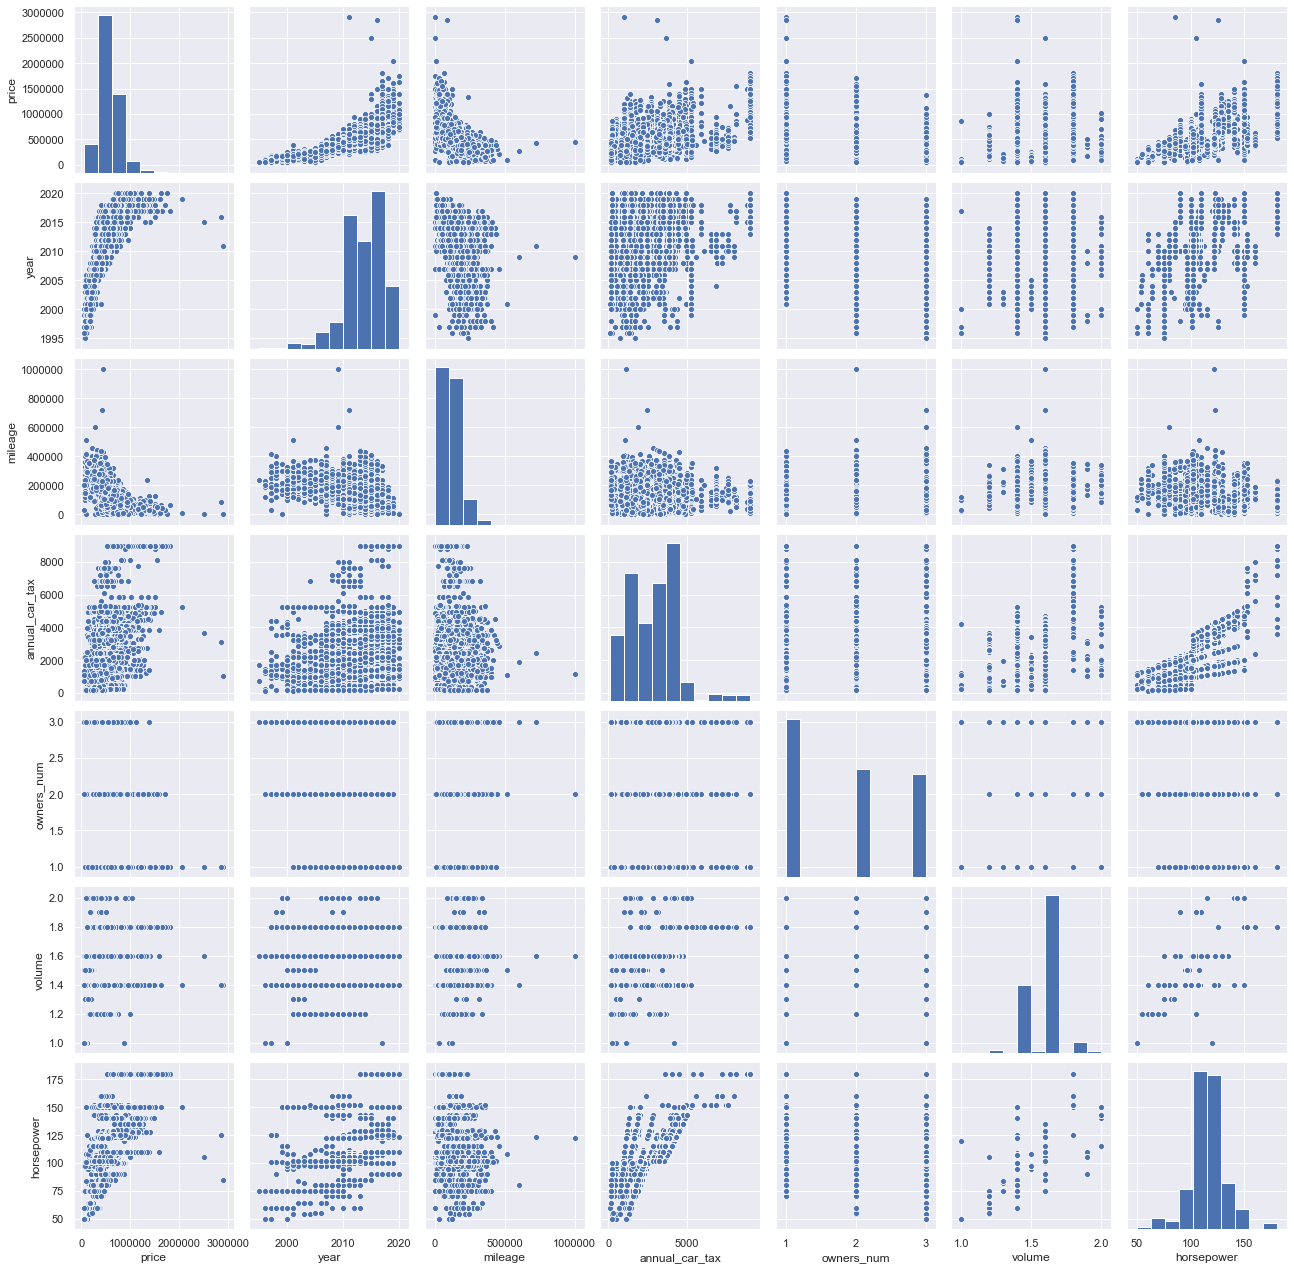

In [10]:
sns.pairplot(automobile_data);

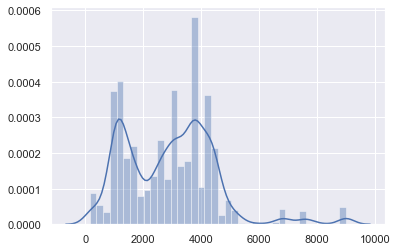

In [11]:
# Distribution of annual car tax
sns.distplot(automobile_data['annual_car_tax'].values);

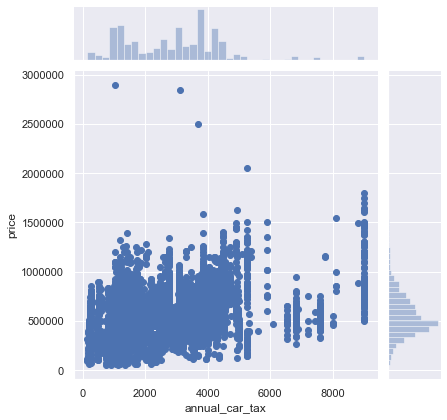

In [12]:
sns.jointplot(x='annual_car_tax', y='price', data=automobile_data);

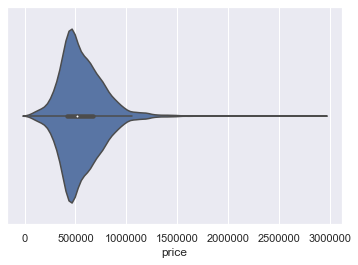

In [13]:
sns.violinplot(automobile_data['price']);

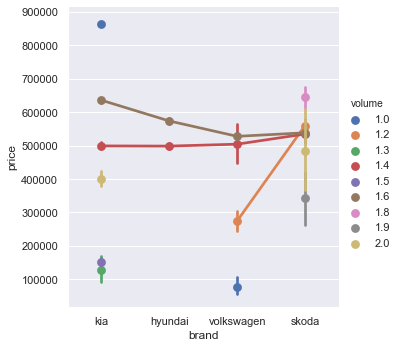

In [20]:
sns.catplot('brand','price',hue = 'volume', kind = 'point', data=automobile_data);

### Correlation between features

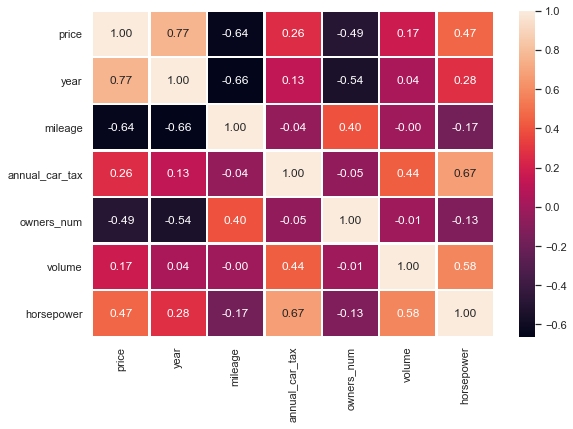

In [14]:
corr_matrix = automobile_data.corr()

f,ax = plt.subplots(figsize=(9,6))

sns.heatmap(corr_matrix, annot=True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()